In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, OrdinalEncoder, LabelEncoder,OneHotEncoder

In [13]:
ma_df = pd.read_csv('ma_round3.csv')
numericals = ma_df.select_dtypes(np.number)
numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


# X,Y split 

In [16]:

nan_count = numericals.isna().sum().sum()
nan_count

X = numericals[['customer_lifetime_value','income','monthly_premium_auto','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
y = numericals['total_claim_amount']



# train , test split

In [17]:


from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

# Standardise

In [21]:


from sklearn.preprocessing import MinMaxScaler

p_scaler = PowerTransformer()

p_scaler.fit(X_train)     # no need to reshape due to dataframe
X_train = p_scaler.transform(X_train)    #transform

# Regression

In [22]:


from sklearn.linear_model import LinearRegression

lm = LinearRegression()

model = lm.fit(X_train, y_train)

In [23]:
model.coef_

array([ -2.0970093 , -36.80029221, 161.13138265,  -2.15845   ,
        -1.19803129,   1.5999509 ])

In [24]:
model.intercept_

433.3067361668137

# Evaluate with scaled test data

In [31]:

X_test_scaled = p_scaler.transform(X_test)

y_pred = model.predict(X_test_scaled)

residuals = y_pred - y_test

res_df = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred, 'residuals':residuals})
res_df

,y_test,y_pred,residuals
3487,120,154.174744,34.174744
668,660,602.654438,-57.345562
10315,244,382.012829,138.012829
5332,86,217.621488,131.621488
1523,1032,755.767612,-276.232388
...,...,...,...
5928,406,598.309218,192.309218
3706,321,269.217128,-51.782872
7735,45,369.619837,324.619837
9320,597,622.189658,25.189658


# MSE

In [32]:

from sklearn.metrics import mean_squared_error as mse

mse(y_test,y_pred)  # mean squared error

57869.09307638993

# Chart 

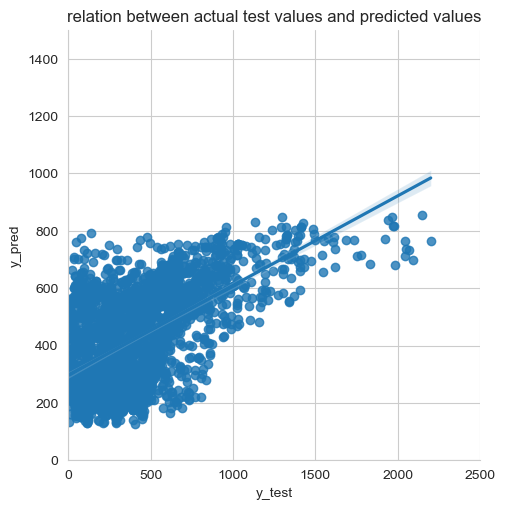

In [43]:
sns.set_style("whitegrid")
g = sns.lmplot(x="y_test", y="y_pred",data=res_df)
g = (g.set_axis_labels(x="y_test",y="y_pred").set(xlim=(0,2500),ylim=(0,1500)))
plt.title("relation between actual test values and predicted values")
plt.show(g)

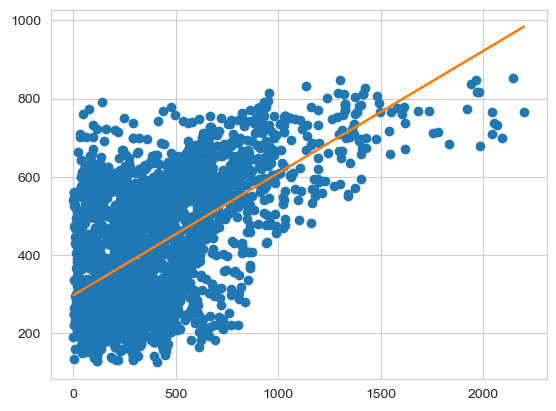

In [47]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b)

# https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy